Welcome to the Practice Session 9! 

In [61]:
import YData 

#YData.download_practice_code(9)               # Without Answers. 
#YData.download_practice_code(9, True)         # With Answers (won't work until Friday eve).

YData.download_data("loan_data.csv")
YData.download_data("neural_nets.png")

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
loans = pd.read_csv("loan_data.csv")


In [63]:
loans.shape

(45000, 14)

In [64]:
loans.head(3)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1


The dataset above comprises 45,000 records of personal and financial data, designed to facilitate the development of predictive models for risk assessment. 

**Codebook:**

- `person_age`: Person's Age.
- `person_gender`: Person's Gender (male or female).
- `person_education`: Person's Education (High School, Bachelor, Master, etc.).
- `person_income`: Person's Annual Income (in USD). 
- `person_emp_exp`: Person's Employment Experience (measured in years; experience less than 1 year is coded as 0).
- `person_home_ownership`:Person's Home Ownership Type (Rent or Own or Mortgage).
- `loan_amnt`: Loan Amount Applied For (in USD).
- `loan_intent`: Reason for Loan application (Personal, Education, etc.).
- `loan_int_rate`: Interest Rate offered (annual).
- `loan_percent_income`: Loan amount applied for as a percentage of Annual Income.
- `cb_person_cred_hist_length`: Credit History length (in Years).
- `credit_score`: Credit Score. 
- `previous_loan_defaults_on_file`: If the person ever defaulted (Yer or No).
- `loan_status`: If the person's loan application was approved (coded as 1) or not (coded as 0).


# Classification

We are interted in determining the binary outcome of loan approval, indicating whether an applicant is likely to be approved or denied for a loan.

The dataset above includes diverse features such as demographic information, credit history, employment status, income levels, existing debt, and other relevant financial metrics, providing a comprehensive foundation for sophisticated data-driven analysis and decision-making.

One again, here `loan_status = 1` means that the loan was approved and `loan_status = 0` means the loan was denied.

## 1. Let us count how many loan applications were "approved" and "denied". 





In [65]:
# Let us count the numner of approvals and denials. 

approvals = np.sum(loans["loan_status"])
denials = 45_000 - approvals
print(approvals, denials)


10000 35000


##### Some Food for Thought!

A. If we had to guess the approval or denial of a loan without knowing any of the features in the DataFrame above, what should we guess? 
 


B. If we were to following the optimal `guessing` strategy above, what percent of our guess would be correct on the data above (i.e., what would our classification accuracy be)?

 


In [66]:
# Type Your Answers in this cell. 


# Answer A: We should always guess Denial. 



# Answer B: About 77.77%. 
# Justification. 
approval_rate = approvals/45_000
denial_rate = denials/45_000
print(approval_rate, denial_rate)





0.2222222222222222 0.7777777777777778


## 2.  **$k$ -Nearest Neighbors classifier**


To explore classification, let's build a k-Nearest Neighbors classifier to predict whether an applicant is likely to be approved or denied based on **quantitative** variables in the `loans` DataFrame above.




To begin the classification process, let's store the features (X) and the labels (y) under separate names called `X_loans_features` and `y_loans_labels` respectively. 

In [67]:
loans.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [68]:
# Get the features and the labels.

X_loans_features = loans[[
    'person_age', 
    'person_income',
    'person_emp_exp',
    'loan_amnt',
    'loan_int_rate', 
    'loan_percent_income', 
    'cb_person_cred_hist_length',
    'credit_score']]


y_loans_labels = loans["loan_status"]







1. Let us now construct a K-Nearest Neighbor classifier (KNN) using 5 neighbors (i.e., k = 5 so we are using a 5-Nearest Neighbor classifier). 

- We can do this using the `KNeighborsClassifier(n_neighbors = )` function.  

- Feel free to choose `k` to be different from 5 (just be consistent with that throughout).

In [69]:
from sklearn.neighbors import KNeighborsClassifier

# Construct a 5 nearest neighbor classifier.

knn = KNeighborsClassifier(n_neighbors = 5)





2. Let's now train the classifier ("the KNN classifier just stores the data during training"). You may use `knn.fit()` method.


In [70]:
# Train the classifier (which for a KNN classifier just involves memorizing the training data).

knn.fit(X_loans_features, y_loans_labels)



KNeighborsClassifier()

3. Let's now use the classifier to make predictions. You may use `knn.predict()` method.

In [71]:
# Make first 25 predictions.

predictions = knn.predict(X_loans_features)
predictions[0:25]


array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1])

4. Let's get the prediction (classificaton) accuracy which is the proportion of predictions that are correct.

In [72]:
# Get the classification accuracy.

accuracy_rate = np.mean(predictions == y_loans_labels)
accuracy_rate





np.float64(0.8805777777777778)

##### Accuracy rate of about 88%! Woow! Do we need a sanity check?






##### Let's repeat our analysis with k = 1 to see what happens...







In [73]:
# What happens if k = 1?

# Construct a classifier.
knn = KNeighborsClassifier(n_neighbors = 1) 

# "Train” the classifier (which for a KNN classifier just involves memorizing the training data).
knn.fit(X_loans_features, y_loans_labels) 

# Make predictions.
preditions = knn.predict(X_loans_features)

# Get classification accuracy.
np.mean(preditions == y_loans_labels)

np.float64(1.0)

Do we believe we have a perfect classifier?

1. Yes or No?
- Type your answer here: 
2. Explain your choice above in two or three lines below:
- Type your answer here: 

### Cross-validation

To avoid over-fitting, we need to split our data into a training and test set. 

The classifier "learns" the relationship between features (X) and labels (y) on the `training set`.

The classifier makes predictions on the features (X) of the `test set`. 

We compare the classifier's predictions on the test features (X) to the actual labels y, to get a more accuracy assessment of the **classification accuracy**.


Let's try this now...



In [74]:
# Manually create a training with 10,000 examples, and a test set that has the rest of the data.


X_train_manual = X_loans_features.iloc[0:10000]
y_train_manual = y_loans_labels.iloc[0:10000]

X_test_manual = X_loans_features.iloc[10000:]
y_test_manual = y_loans_labels.iloc[10000:]


print(X_train_manual.shape)
print(X_test_manual.shape)







(10000, 8)
(35000, 8)


In [75]:
# One can also split data using the function "train_test_split".

from sklearn.model_selection import train_test_split

# Split data into a training and test set (default is 75/25 split).

X_train, X_test, y_train, y_test = train_test_split(X_loans_features,  
                                                    y_loans_labels,
                                                    test_size = 0.50,
                                                    random_state = 0)

print(X_train.shape)
print(X_test.shape)

X_train.head(3)

(22500, 8)
(22500, 8)


,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score
1569,24.0,39493.0,3,1500.0,13.92,0.04,4.0,662
2340,21.0,39308.0,0,6000.0,8.90,0.15,3.0,584
36401,31.0,48890.0,7,4750.0,9.70,0.10,8.0,698


## Now let us train the model on the **training** data. 

In [76]:
from sklearn.neighbors import KNeighborsClassifier


# 1. Construct a classifier.
knn = KNeighborsClassifier(n_neighbors = 1) 

# 2. “Train” the classifier (which for a KNN classifier just involves memorizing the training data).
knn.fit(X_train_manual, y_train_manual) 



KNeighborsClassifier(n_neighbors=1)

In [77]:
# 3. Get the predictions.

preditions_2 = knn.predict(X_test_manual)

preditions_2[0:25]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [78]:
# 4. Get the prediction accuracy. 

np.mean(preditions_2 == y_test_manual)



np.float64(0.7681714285714286)

### Does this prediction Accuracy makes sense?
Explain: 

### How can you improve the accuray?
Explain:

#### The `.score()` method

In [79]:
# Test the classifier on the test set using the .score() method.
# prediction accuracy on the test set.

print(knn.score(X_test_manual, y_test_manual))




# What happens if we test the classifier on the training set? 
# prediction accuracy on the training set.

print(knn.score(X_train_manual, y_train_manual)) 




0.7681714285714286
1.0


## K-fold cross-validation

In k-fold cross-validation we split our data into k-parts (note, the k here has no relation to the $k$ in $k$-Nearest Neighbor - it is just that k is a frequent letter to use in math to denote integer values).  

To run a k-fold cross-validation analysis, we train the classifier on k-1 parts of the data and test it on the remaining part. We repeat this process k times to get k classification accuracies. We then take the average of these results as our estimate of our overall classification accuracy. 

We can use the scikit-learn `cross_val_score()` to easily do this...


In [80]:
from sklearn.model_selection import cross_val_score

# Construct knn classifer. 
knn = KNeighborsClassifier(n_neighbors = 1) 

# Do 5-fold cross-validation.
scores = cross_val_score(knn, X_loans_features, y_loans_labels, cv = 5)
print(scores)
print(np.mean(scores))


[0.77811111 0.80788889 0.78877778 0.81655556 0.82911111]
0.8040888888888889


# Take Home Problem: **Neural Networks**

Many other types of classifiers that have been created. Scikit-learn makes it very easy to try out a range of classifiers. 

Let's explore nueral networks on our loans data.....

We will continue with our loans example using the `multilayer perceptron` (MLP). The multilayer perceptron (MLP) is a feedforward artificial neural network model that maps sets of input data onto a set of appropriate outputs. An MLP consists of multiple layers and each layer is fully connected to the following one. The nodes of the layers are neurons using nonlinear activation functions, except for the nodes of the input layer. There can be one or more non-linear hidden layers between the input and the output layer.

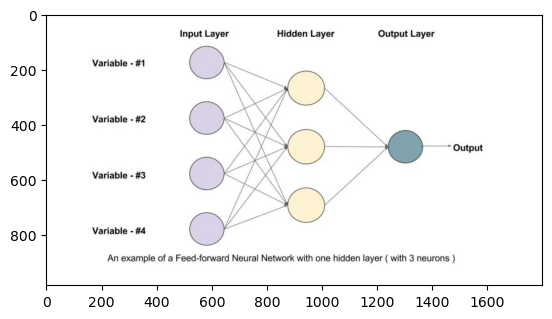

In [81]:
neural_net = plt.imread("neural_nets.png");
plt.imshow(neural_net);

In [82]:
# Suppress ConvergenceWarning - please ignore this code 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [83]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', 
                    alpha=1e-5,
                    hidden_layer_sizes=(100,), 
                    random_state=1)

clf.fit(X_train_manual, y_train_manual)   

MLPClassifier(alpha=1e-05, random_state=1, solver='lbfgs')

In [84]:
from sklearn.metrics import accuracy_score

predictions_train = clf.predict(X_train_manual)
predictions_test = clf.predict(X_test_manual)
train_score = accuracy_score(predictions_train, y_train_manual)
print("score on train data: ", train_score)
test_score = accuracy_score(predictions_test, y_test_manual)
print("score on test data: ", test_score)

score on train data:  0.7549
score on test data:  0.7843142857142857
